In [2210]:
# Xây dựng mô hình hồi quy tuyến tính với dữ liệu dataset.csv
# Dữ liệu dataset.csv gồm nhiều cột. trong đó cột dự đoán là cột "USD" và các cột còn lại là các cột độc lập
# Yêu cầu: Xây dựng mô hình hồi quy tuyến tính với dữ liệu dataset.csv
# Bước 1: Đọc dữ liệu từ file dataset.csv
# Bước 2: Tách dữ liệu thành 2 tập X và Y
# Bước 3: Tách tập X và Y thành 2 tập train và test
# Bước 4: Xây dựng mô hình hồi quy tuyến tính với tập train
# Bước 5: Dự đoán kết quả với tập test
# Bước 6: Đánh giá mô hình
# Bước 7: Dự đoán kết quả với 1 giá trị mới
# Bước 8: Vẽ đồ thị mô hình hồi quy tuyến tính
# Bước 9: Vẽ đồ thị dữ liệu thực tế và dữ liệu dự đoán
# Bước 10: Lưu mô hình

In [2211]:
# Bước 1: Đọc dữ liệu từ file dataset.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.discriminant_analysis import StandardScaler
from statistics import LinearRegression
from scipy import stats
from sklearn.feature_selection import f_regression

In [2212]:
df = pd.read_csv('./data/dataset.csv')
print(df.head())

     TinhTrangBDS  DienTich  Phongngu TenPhanKhu  SoTang  PhongTam       Loai  \
0     Đã bàn giao      62.0         2        NaN     NaN         2   Chung cư   
1     Đã bàn giao      95.0         3        NaN     NaN         2   Chung cư   
2   Chưa bàn giao      75.0         2          2     5.0         2   Chung cư   
3     Đã bàn giao      70.0         1          A     7.0         1   Chung cư   
4     Đã bàn giao      83.0         2        NaN     NaN         2   Chung cư   

          GiayTo      MaCanHo   TinhTrangNoiThat HuongCuaChinh HuongBanCong  \
0       Đã có sổ          NaN                NaN           NaN          NaN   
1    Đang chờ sổ          NaN   Nội thất cao cấp           NaN          NaN   
2   Giấy tờ khác           17                NaN      Đông Nam     Đông Nam   
3    Đang chờ sổ   BPA - 0712   Nội thất cao cấp      Đông Nam      Tây Bắc   
4       Đã có sổ          NaN   Nội thất cao cấp       Tây Bắc          NaN   

    DacDiem            Quan       USD 

In [2213]:
# in ra tỉ lệ nan của từng cột
df.isna().sum()/df.shape[0]*100

TinhTrangBDS         0.000000
DienTich             0.000000
Phongngu             0.000000
TenPhanKhu          71.745885
SoTang              73.165099
PhongTam             0.000000
Loai                 0.000000
GiayTo              24.416359
MaCanHo             86.458683
TinhTrangNoiThat    48.778132
HuongCuaChinh       62.277461
HuongBanCong        65.019315
DacDiem             77.628485
Quan                 0.000000
USD                  0.000000
dtype: float64

In [2214]:
# xóa các cột có tỉ lệ nan > 50%
# vòng lặp while để xóa các cột có tỉ lệ nan > 50% cho đến khi nào không còn cột nào có tỉ lệ nan > 50%, lưu vào df_dropped
df_dropped = df.copy()
while True:
    for col in df_dropped.columns:
        if df_dropped[col].isna().sum()/df_dropped.shape[0]*100 > 50:
            df_dropped = df_dropped.drop(col, axis=1)
            break
    else:
        break


In [2215]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23816 entries, 0 to 23815
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TinhTrangBDS      23816 non-null  object 
 1   DienTich          23816 non-null  float64
 2   Phongngu          23816 non-null  int64  
 3   PhongTam          23816 non-null  int64  
 4   Loai              23816 non-null  object 
 5   GiayTo            18001 non-null  object 
 6   TinhTrangNoiThat  12199 non-null  object 
 7   Quan              23816 non-null  object 
 8   USD               23816 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [2216]:
df_dropped.head(5)

,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Quan,USD
0,Đã bàn giao,62.0,2,2,Chung cư,Đã có sổ,NaN,Quận 7,80000.0
1,Đã bàn giao,95.0,3,2,Chung cư,Đang chờ sổ,Nội thất cao cấp,Quận 7,212000.0
2,Chưa bàn giao,75.0,2,2,Chung cư,Giấy tờ khác,NaN,Quận Bình Tân,103200.0
3,Đã bàn giao,70.0,1,1,Chung cư,Đang chờ sổ,Nội thất cao cấp,Quận Tân Bình,160000.0
4,Đã bàn giao,83.0,2,2,Chung cư,Đã có sổ,Nội thất cao cấp,Quận 6,118000.0


In [2217]:
df_x = df_dropped.drop(['USD'], axis=1)
df_y = df_dropped['USD']

In [2218]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,DienTich,Phongngu,PhongTam,TinhTrangBDS_ Đã bàn giao,TinhTrangBDS_Đã bàn giao,"Loai_ Căn hộ dịch vụ, mini",Loai_ Duplex,Loai_ Officetel,Loai_ Penthouse,"Loai_ Tập thể, cư xá",...,Quan_ Quận 7,Quan_ Quận 8,Quan_ Quận 9,Quan_ Quận Bình Thạnh,Quan_ Quận Bình Tân,Quan_ Quận Gò Vấp,Quan_ Quận Phú Nhuận,Quan_ Quận Thủ Đức,Quan_ Quận Tân Bình,Quan_ Quận Tân Phú
0,62.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,95.00,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,70.00,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,83.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,68.52,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23812,76.00,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23813,115.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23814,82.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale data về dạng chuẩn

In [2219]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)

StandardScaler()

In [2220]:
data_preprocessed = scaler.transform(data_preprocessed)

In [2221]:
# Bước 2: Tách dữ liệu thành 2 tập X và Y
X = data_preprocessed
Y = df_y


In [2222]:
# Bước 3: Tách tập X và Y thành 2 tập train và test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(19052, 37)
(19052,)
(4764, 37)
(4764,)


In [2223]:
# Bước 4: Xây dựng mô hình hồi quy tuyến tính với tập train
model = linear_model.LinearRegression().fit(X_train, Y_train)

In [2224]:
# Bước 5: Dự đoán kết quả với tập test
Y_pred = model.predict(X_test).__abs__()
Y_pred

array([ 27819.59053132,  44813.54615649,  44040.24739953, ...,
       150923.74964156, 224135.06831018, 286382.73194023])

In [2225]:
perc = np.abs((Y_pred - Y_test)/Y_test)
perc = perc.values*100

In [2226]:
np.array([Y_pred, Y_test, perc])

array([[2.78195905e+04, 4.48135462e+04, 4.40402474e+04, ...,
        1.50923750e+05, 2.24135068e+05, 2.86382732e+05],
       [3.64000000e+04, 7.40000000e+04, 5.68000000e+04, ...,
        1.56000000e+05, 2.12000000e+05, 2.20000000e+05],
       [2.35725535e+01, 3.94411538e+01, 2.24643532e+01, ...,
        3.25400664e+00, 5.72408883e+00, 3.01739691e+01]])

In [2227]:
data = {'Gia du doan':Y_pred,
        'Gia thuc':Y_test,
       '% sai lech': perc}
A = pd.DataFrame(data)
A

,Gia du doan,Gia thuc,% sai lech
12983,27819.590531,36400.0,23.572553
4291,44813.546156,74000.0,39.441154
6242,44040.247400,56800.0,22.464353
1056,161715.063526,174000.0,7.060308
423,145733.111788,100000.0,45.733112
...,...,...,...
12078,86587.674834,76000.0,13.931151
2312,145498.725863,332000.0,56.175083
10662,150923.749642,156000.0,3.254007
13642,224135.068310,212000.0,5.724089


In [2228]:
B = A.sort_values(by=['% sai lech'])
B

,Gia du doan,Gia thuc,% sai lech
23048,31999.897182,32000.0,0.000321
9084,98017.511165,98000.0,0.017869
15911,76015.466167,76000.0,0.020350
22810,143967.766985,144000.0,0.022384
22634,245944.853573,246000.0,0.022417
...,...,...,...
12235,104233.226618,10400.0,902.242564
12441,101637.303947,10000.0,916.373039
23784,190227.663481,16800.0,1032.307521
22934,560411.809473,16000.0,3402.573809


In [2229]:
# in ra tổng các dữ liệu Y_test nếu % sai lệch > 50%
B[B['% sai lech'] > 50]['Gia thuc'].count()

725

In [2230]:
(sum((model.predict(X_test) - Y_test)**2)/len(Y_test))**0.5

47063.393323961696

In [2231]:
B['% sai lech'].describe()

count    4764.000000
mean       36.787792
std        98.489957
min         0.000321
25%         8.430175
50%        17.969768
75%        35.376909
max      3452.331269
Name: % sai lech, dtype: float64

In [2232]:
# Bước 6: Đánh giá mô hình
# in ra R square
print('R square: ', r2_score(Y_test, Y_pred))

# in ra MSE
print('MSE: ', mean_squared_error(Y_test, Y_pred))
# in ra MAE
print('MAE: ', np.mean(np.abs(Y_pred - Y_test)))
# in ra RMSE
print('RMSE: ', mean_squared_error(Y_test, Y_pred, squared=False))

# in ra hệ số chặn 
print('Hệ số chặn: ', model.intercept_)
print("\n")


R square:  0.625111812793609
MSE:  2213407646.9582176
MAE:  27792.94535752544
RMSE:  47046.86649457345
Hệ số chặn:  110500.3485170993




In [2233]:
for col, coef in zip(data_dummies, model.coef_):
    print(col, ': ', coef)

DienTich :  41545.20909943704
Phongngu :  4500.6919955020385
PhongTam :  1997.3604971885943
TinhTrangBDS_ Đã bàn giao :  -981.8380777571011
TinhTrangBDS_Đã bàn giao :  319.6722662164184
Loai_ Căn hộ dịch vụ, mini :  1748.9829846203713
Loai_ Duplex :  467.58869402602966
Loai_ Officetel :  1012.3573179734713
Loai_ Penthouse :  961.6587696686083
Loai_ Tập thể, cư xá :  887.3640740494263
GiayTo_ Đang chờ sổ :  1108.0496985821578
GiayTo_ Đã có sổ :  -6469.175112468288
TinhTrangNoiThat_ Hoàn thiện cơ bản :  555.3718089828046
TinhTrangNoiThat_ Nội thất cao cấp :  7161.242192976821
TinhTrangNoiThat_ Nội thất đầy đủ :  545.3234554573326
Quan_ Huyện Củ Chi :  -2260.018744523256
Quan_ Huyện Hóc Môn :  -1584.7135483726095
Quan_ Huyện Nhà Bè :  -658.0338939894065
Quan_ Quận 1 :  12097.155144905251
Quan_ Quận 10 :  13202.894913642005
Quan_ Quận 11 :  2058.4724948359376
Quan_ Quận 12 :  570.5630067892697
Quan_ Quận 2 :  17903.260526898735
Quan_ Quận 3 :  4742.475291908582
Quan_ Quận 4 :  8986.9384303

In [2249]:
# Phương trình hồi quy tuyến tính
print('y =', model.intercept_)
for col, coef in zip(data_dummies, model.coef_):
    print('+ {:.2f} * {}'.format(coef, col))


y = 110500.3485170993
+ 41545.21 * DienTich
+ 4500.69 * Phongngu
+ 1997.36 * PhongTam
+ -981.84 * TinhTrangBDS_ Đã bàn giao
+ 319.67 * TinhTrangBDS_Đã bàn giao
+ 1748.98 * Loai_ Căn hộ dịch vụ, mini
+ 467.59 * Loai_ Duplex
+ 1012.36 * Loai_ Officetel
+ 961.66 * Loai_ Penthouse
+ 887.36 * Loai_ Tập thể, cư xá
+ 1108.05 * GiayTo_ Đang chờ sổ
+ -6469.18 * GiayTo_ Đã có sổ
+ 555.37 * TinhTrangNoiThat_ Hoàn thiện cơ bản
+ 7161.24 * TinhTrangNoiThat_ Nội thất cao cấp
+ 545.32 * TinhTrangNoiThat_ Nội thất đầy đủ
+ -2260.02 * Quan_ Huyện Củ Chi
+ -1584.71 * Quan_ Huyện Hóc Môn
+ -658.03 * Quan_ Huyện Nhà Bè
+ 12097.16 * Quan_ Quận 1
+ 13202.89 * Quan_ Quận 10
+ 2058.47 * Quan_ Quận 11
+ 570.56 * Quan_ Quận 12
+ 17903.26 * Quan_ Quận 2
+ 4742.48 * Quan_ Quận 3
+ 8986.94 * Quan_ Quận 4
+ 17462.37 * Quan_ Quận 5
+ 3628.76 * Quan_ Quận 6
+ 9506.17 * Quan_ Quận 7
+ 1812.61 * Quan_ Quận 8
+ 5274.86 * Quan_ Quận 9
+ 14020.86 * Quan_ Quận Bình Thạnh
+ 303.55 * Quan_ Quận Bình Tân
+ 4070.77 * Quan_ Quậ

In [2247]:
# Coefficients of the regression equation
intercept = 110500.3485170993
coefficients = {
    "DienTich": 41545.21,
    "Phongngu": 4500.69,
    "PhongTam": 1997.36,
    "TinhTrangBDS_ Đã bàn giao": -981.84,
    "TinhTrangBDS_Đã bàn giao": 319.67,
    "Loai_ Căn hộ dịch vụ, mini": 1748.98,
    "Loai_ Duplex": 467.59,
    "Loai_ Officetel": 1012.36,
    "Loai_ Penthouse": 961.66,
    "Loai_ Tập thể, cư xá": 887.36,
    "GiayTo_ Đang chờ sổ": 1108.05,
    "GiayTo_ Đã có sổ": -6469.18,
    "TinhTrangNoiThat_ Hoàn thiện cơ bản": 555.37,
    "TinhTrangNoiThat_ Nội thất cao cấp": 7161.24,
    "TinhTrangNoiThat_ Nội thất đầy đủ": 545.32,
    "Quan_ Huyện Củ Chi": -2260.02,
    "Quan_ Huyện Hóc Môn": -1584.71,
    "Quan_ Huyện Nhà Bè": -658.03,
    "Quan_ Quận 1": 12097.16,
    "Quan_ Quận 10": 13202.89,
    "Quan_ Quận 11": 2058.47,
    "Quan_ Quận 12": 570.56,
    "Quan_ Quận 2": 17903.26,
    "Quan_ Quận 3": 4742.48,
    "Quan_ Quận 4": 8986.94,
    "Quan_ Quận 5": 17462.37,
    "Quan_ Quận 6": 3628.76,
    "Quan_ Quận 7": 9506.17,
    "Quan_ Quận 8": 1812.61,
    "Quan_ Quận 9": 5274.86,
    "Quan_ Quận Bình Thạnh": 14020.86,
    "Quan_ Quận Bình Tân": 303.55,
    "Quan_ Quận Gò Vấp": 4070.77,
    "Quan_ Quận Phú Nhuận": 13222.85,
    "Quan_ Quận Thủ Đức": 901.84,
    "Quan_ Quận Tân Bình": 8360.67,
    "Quan_ Quận Tân Phú": 6404.75
}


# Create the regression equation string
regression_equation = "y = {:.2f}".format(intercept)
for feature, coefficient in coefficients.items():
    regression_equation += " + {:.2f} * {}".format(coefficient, feature)

# Print the regression equation
print(regression_equation)


y = 110500.35 + 41545.21 * DienTich + 4500.69 * Phongngu + 1997.36 * PhongTam + -981.84 * TinhTrangBDS_ Đã bàn giao + 319.67 * TinhTrangBDS_Đã bàn giao + 1748.98 * Loai_ Căn hộ dịch vụ, mini + 467.59 * Loai_ Duplex + 1012.36 * Loai_ Officetel + 961.66 * Loai_ Penthouse + 887.36 * Loai_ Tập thể, cư xá + 1108.05 * GiayTo_ Đang chờ sổ + -6469.18 * GiayTo_ Đã có sổ + 555.37 * TinhTrangNoiThat_ Hoàn thiện cơ bản + 7161.24 * TinhTrangNoiThat_ Nội thất cao cấp + 545.32 * TinhTrangNoiThat_ Nội thất đầy đủ + -2260.02 * Quan_ Huyện Củ Chi + -1584.71 * Quan_ Huyện Hóc Môn + -658.03 * Quan_ Huyện Nhà Bè + 12097.16 * Quan_ Quận 1 + 13202.89 * Quan_ Quận 10 + 2058.47 * Quan_ Quận 11 + 570.56 * Quan_ Quận 12 + 17903.26 * Quan_ Quận 2 + 4742.48 * Quan_ Quận 3 + 8986.94 * Quan_ Quận 4 + 17462.37 * Quan_ Quận 5 + 3628.76 * Quan_ Quận 6 + 9506.17 * Quan_ Quận 7 + 1812.61 * Quan_ Quận 8 + 5274.86 * Quan_ Quận 9 + 14020.86 * Quan_ Quận Bình Thạnh + 303.55 * Quan_ Quận Bình Tân + 4070.77 * Quan_ Quận Gò Vấp

In [2251]:
# Bước 7: Dự đoán kết quả với 1 giá trị mới
# Giá trị mới
new_data = {
    "DienTich": [100],
    "Phongngu": [2],
    "PhongTam": [1],
    "TinhTrangBDS_ Đã bàn giao": [0],
    "TinhTrangBDS_Đã bàn giao": [0],
    "Loai_ Căn hộ dịch vụ, mini": [0],
    "Loai_ Duplex": [0],
    "Loai_ Officetel": [0],
    "Loai_ Penthouse": [0],
    "Loai_ Tập thể, cư xá": [0],
    "GiayTo_ Đang chờ sổ": [0],
    "GiayTo_ Đã có sổ": [1],
    "TinhTrangNoiThat_ Hoàn thiện cơ bản": [0],
    "TinhTrangNoiThat_ Nội thất cao cấp": [0],
    "TinhTrangNoiThat_ Nội thất đầy đủ": [1],
    "Quan_ Huyện Củ Chi": [0],
    "Quan_ Huyện Hóc Môn": [0],
    "Quan_ Huyện Nhà Bè": [0],
    "Quan_ Quận 1": [0],
    "Quan_ Quận 10": [0],
    "Quan_ Quận 11": [0],
    "Quan_ Quận 12": [0],
    "Quan_ Quận 2": [0],
    "Quan_ Quận 3": [0],
    "Quan_ Quận 4": [0],
    "Quan_ Quận 5": [0],
    "Quan_ Quận 6": [0],
    "Quan_ Quận 7": [1],
    "Quan_ Quận 8": [0],
    "Quan_ Quận 9": [0],
    "Quan_ Quận Bình Thạnh": [0],
    "Quan_ Quận Bình Tân": [0],
    "Quan_ Quận Gò Vấp": [0],
    "Quan_ Quận Phú Nhuận": [0],
    "Quan_ Quận Thủ Đức": [0],
    "Quan_ Quận Tân Bình": [0],
    "Quan_ Quận Tân Phú": [0]
}

# Convert the dictionary into a dataframe
new_data_df = pd.DataFrame(new_data)

# Scale the new data
new_data_scaled = scaler.transform(new_data_df)

# Make a prediction for the new data point
price_pred = model.predict(new_data_scaled)

# Print the prediction
print("Predicted price:", price_pred[0])


Predicted price: 140588.65516023862


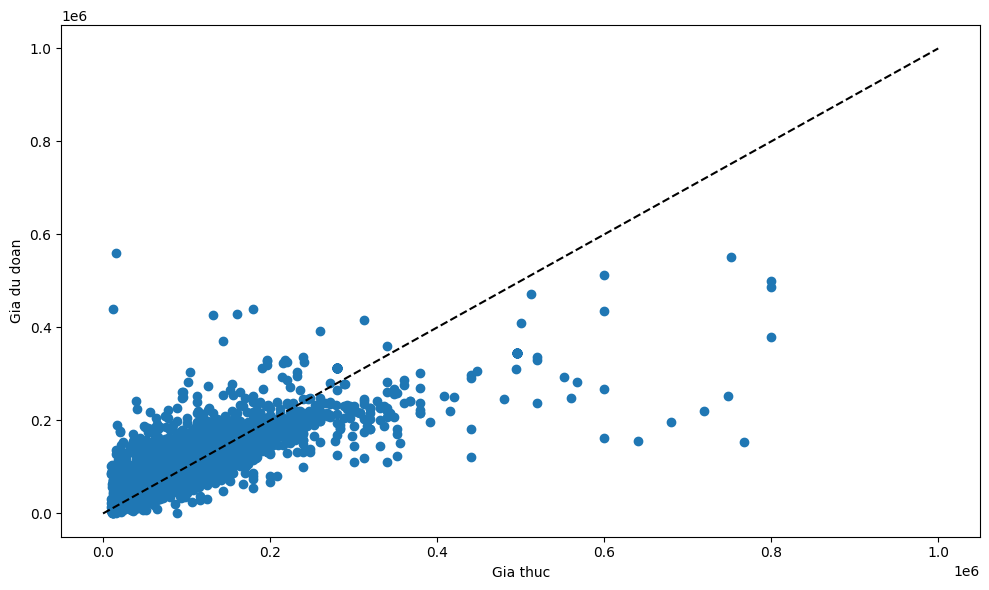

In [2256]:
# Bước 8: Vẽ đồ thị mô hình hồi quy tuyến tính

# Vẽ đồ thị mô hình hồi quy tuyến tính
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 1000000], [0, 1000000], '--k')
plt.axis('tight')
plt.xlabel('Gia thuc')
plt.ylabel('Gia du doan')
plt.tight_layout()
plt.show()


In [2257]:
# in ra MSE của train và test
print('MSE train: ', mean_squared_error(Y_train, model.predict(X_train)))
print('MSE test: ', mean_squared_error(Y_test, model.predict(X_test)))

MSE train:  2465112721.3696737
MSE test:  2214962991.1659203


In [2260]:
# in ra  R-squared, MAE của train và test  và khả năng dự đoán chính xác trên dữ liệu thực tế
print('R-squared train: ', r2_score(Y_train, model.predict(X_train)))
print('R-squared test: ', r2_score(Y_test, model.predict(X_test)))
print('MAE train: ', np.mean(np.abs(model.predict(X_train) - Y_train)))
print('MAE test: ', np.mean(np.abs(model.predict(X_test) - Y_test)))
print('Khả năng dự đoán chính xác trên dữ liệu thực tế: ', 1 - np.mean(np.abs(model.predict(X_test) - Y_test))/np.mean(Y_test))

# in ra RMSE của train và test
print('RMSE train: ', mean_squared_error(Y_train, model.predict(X_train), squared=False))
print('RMSE test: ', mean_squared_error(Y_test, model.predict(X_test), squared=False))


R-squared train:  0.5991708182959874
R-squared test:  0.6248483818023458
MAE train:  28394.323695746196
MAE test:  27832.306114755735
Khả năng dự đoán chính xác trên dữ liệu thực tế:  0.746715525385241
RMSE train:  49649.90152426965
RMSE test:  47063.393323961674
